In [2]:
# Loading the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')
%matplotlib inline

In [4]:
# Loading Data

df_scaled = pd.read_csv("..\data\processed\cc_scaled.csv")

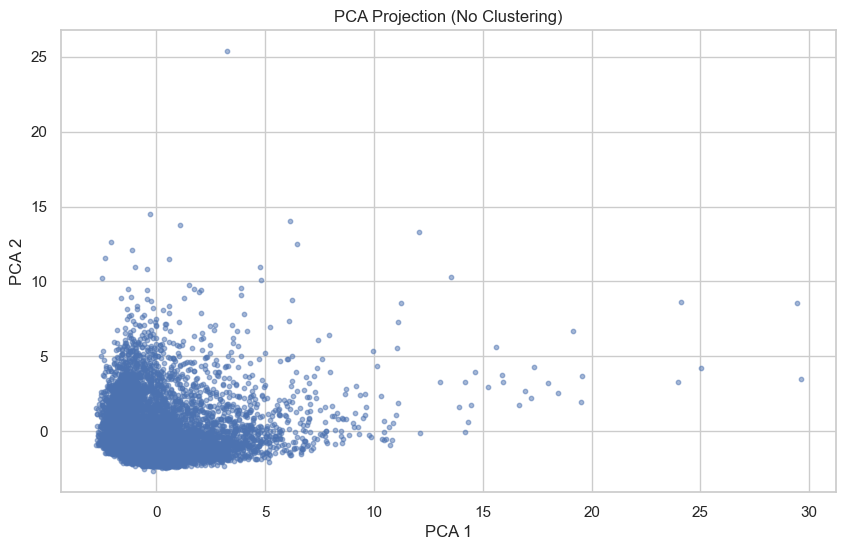

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10, alpha=0.5)
plt.title('PCA Projection (No Clustering)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


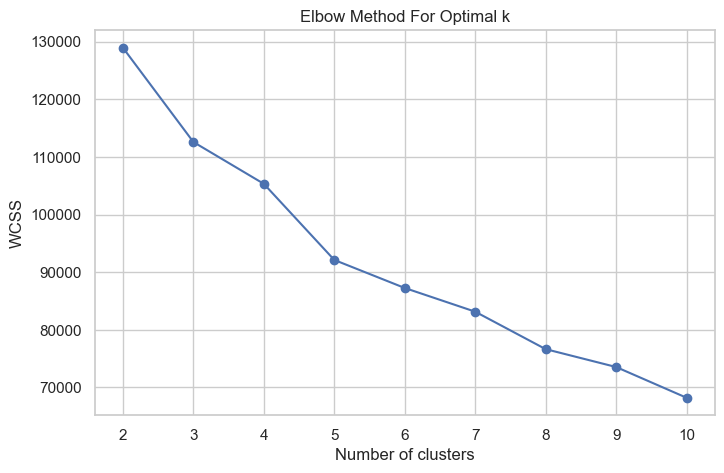

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []  # Within-Cluster Sum of Squares
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


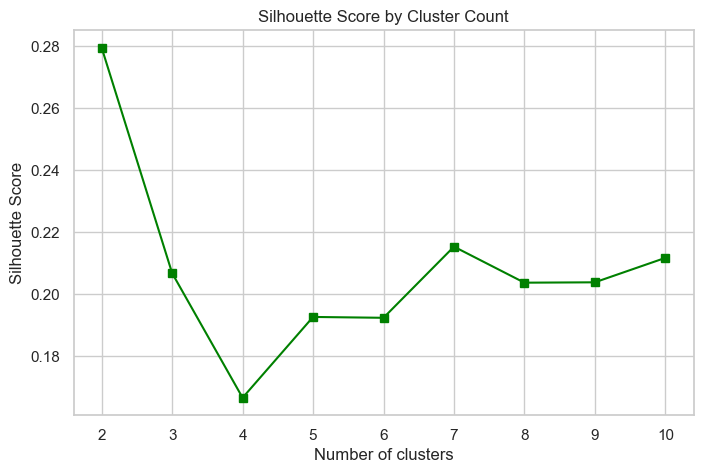

In [9]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Score by Cluster Count')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [10]:
df = pd.read_csv("../data/raw/CC GENERAL.csv")


### With k=5

In [74]:
# Final KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Add labels to original (unscaled) data
df_clusters = df.copy()
df_clusters['Cluster'] = cluster_labels

In [75]:
cluster_profile = df_clusters.select_dtypes(exclude='object').groupby('Cluster').mean().round(2)
cluster_profile.T  # Transpose for better readability


Cluster,0,1,2,3,4
BALANCE,4903.43,3588.99,930.36,1526.12,111.26
BALANCE_FREQUENCY,0.97,0.99,0.96,0.97,0.38
PURCHASES,553.10,7815.73,1299.71,255.46,335.22
ONEOFF_PURCHASES,348.46,5203.52,633.17,206.44,199.44
INSTALLMENTS_PURCHASES,204.74,2613.73,666.74,49.38,136.00
CASH_ADVANCE,4983.09,661.79,226.75,794.78,325.75
PURCHASES_FREQUENCY,0.31,0.94,0.90,0.16,0.28
ONEOFF_PURCHASES_FREQUENCY,0.15,0.74,0.31,0.09,0.07
PURCHASES_INSTALLMENTS_FREQUENCY,0.20,0.79,0.72,0.07,0.20
CASH_ADVANCE_FREQUENCY,0.51,0.07,0.04,0.16,0.04


In [76]:
df_clusters['Cluster'].value_counts().sort_index()


Cluster
0     987
1     395
2    3164
3    3047
4    1357
Name: count, dtype: int64

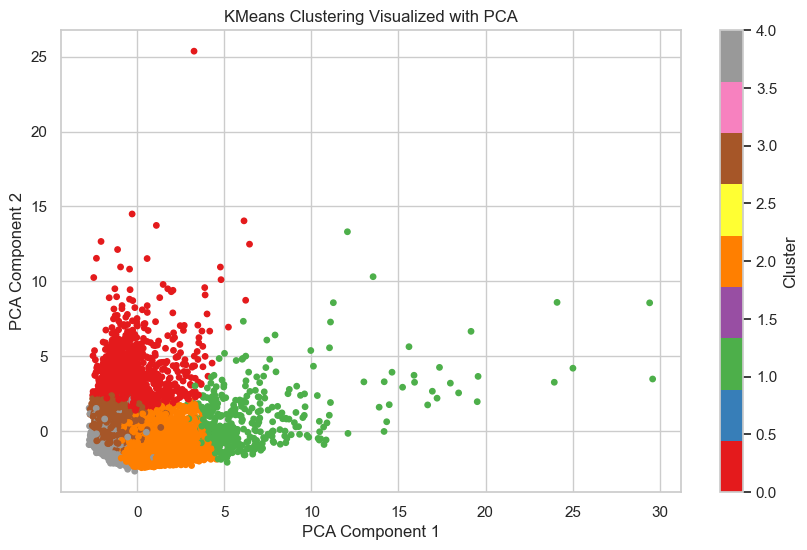

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='Set1', s=15)
plt.title('KMeans Clustering Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
